In [1]:
import keras
import pandas as pd
from keras.layers import Dense, Dropout
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.optimizers import Adam
from imblearn.over_sampling import SMOTE
from keras.layers import LeakyReLU
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
# check version number
import imblearn
print(imblearn.__version__)
1+1

0.7.0


2

In [3]:
data = pd.read_csv("DomainCorrect.csv", delimiter=",")
data.head()
data.tail()


,App,Mins,SpG,KeyP,Rating,Overall rating,BP,CROSSING,FINISHING,ACCELERATION,SPRINT SPEED,REACTIONS,POSITIONING,CLASS
5373,0.389831,0.481275,0.391892,0.452381,0.361486,0.619048,0.333333,0.691176,0.694444,0.694444,0.686567,0.549020,0.610169,2
5374,0.254237,0.246982,0.108108,0.214286,0.250000,0.428571,0.333333,0.588235,0.513889,0.541667,0.477612,0.392157,0.508475,2
5375,0.118644,0.213247,0.229730,0.119048,0.209459,0.476190,0.000000,0.338235,0.652778,0.541667,0.507463,0.450980,0.610169,2
5376,0.169492,0.193439,0.162162,0.309524,0.148649,0.595238,0.333333,0.764706,0.638889,0.597222,0.656716,0.490196,0.627119,2
5377,0.576271,0.628288,0.229730,0.476190,0.385135,0.547619,1.000000,0.750000,0.472222,0.791667,0.731343,0.509804,0.542373,2


In [4]:
data = data.iloc[:,:].values

In [5]:
x = data[:,:13]
y = data[:,13]
y = pd.get_dummies(y).iloc[:,:].values
y.shape
x.shape

(5378, 13)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_val,X_test,y_val,y_test= train_test_split(X_test,y_test, test_size=0.5, random_state=0)

In [7]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
X_r,y_r=oversample.fit_resample(X_train,y_train)

C:\Users\user\anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass classes=[0 1 2] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [8]:
X_r.shape

(8946, 13)

In [9]:
y_r.shape

(8946, 3)

In [10]:
#scaler=StandardScaler()
#x_scaled=scaler.fit_transform(X_train)
#x_test_scaled=scaler.fit_transform(X_test)
#x_scaled

In [11]:
#x_test_scaled

In [12]:
model = Sequential()
model
model.add(Dense(40, input_dim=13, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dense(20, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(3,  activation = 'softmax'))
adam=Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
es=EarlyStopping(monitor='val_loss', mode='min', verbose=0, patience=100,
                 min_delta=0.0001)

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 40)                560       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                820       
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_3 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 63        
Total params: 2,283
Trainable params: 2,283
Non-trainable params: 0
______________________________________________________

In [14]:
history = model.fit(X_r, y_r, validation_data=(X_test, y_test), epochs=100,batch_size=8)     

Epoch 1/100
1119/1119 [==============================] - 2s 2ms/step - loss: 0.6413 - accuracy: 0.6976 - val_loss: 0.4351 - val_accuracy: 0.8216
Epoch 2/100
1119/1119 [==============================] - 2s 1ms/step - loss: 0.4643 - accuracy: 0.7990 - val_loss: 0.4194 - val_accuracy: 0.8234
Epoch 3/100
1119/1119 [==============================] - 2s 1ms/step - loss: 0.4376 - accuracy: 0.8099 - val_loss: 0.3884 - val_accuracy: 0.8420
Epoch 4/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.4218 - accuracy: 0.8239 - val_loss: 0.5202 - val_accuracy: 0.7732
Epoch 5/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.4091 - accuracy: 0.8277 - val_loss: 0.5282 - val_accuracy: 0.7491
Epoch 6/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.4014 - accuracy: 0.8282 - val_loss: 0.4128 - val_accuracy: 0.8253
Epoch 7/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.3984 - accuracy: 0.8295 - val_loss: 0.5185 - val_ac

1119/1119 [==============================] - 1s 1ms/step - loss: 0.2940 - accuracy: 0.8764 - val_loss: 0.4190 - val_accuracy: 0.8457
Epoch 58/100
1119/1119 [==============================] - 2s 1ms/step - loss: 0.2904 - accuracy: 0.8798 - val_loss: 0.4289 - val_accuracy: 0.8104
Epoch 59/100
1119/1119 [==============================] - 2s 1ms/step - loss: 0.2876 - accuracy: 0.8799 - val_loss: 0.4042 - val_accuracy: 0.8271
Epoch 60/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2863 - accuracy: 0.8756 - val_loss: 0.4153 - val_accuracy: 0.8271
Epoch 61/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2852 - accuracy: 0.8797 - val_loss: 0.4174 - val_accuracy: 0.8271
Epoch 62/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2857 - accuracy: 0.8791 - val_loss: 0.4629 - val_accuracy: 0.8011
Epoch 63/100
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2884 - accuracy: 0.8813 - val_loss: 0.3912 - val_accuracy

In [15]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8253


[0.5051482915878296, 0.8252788186073303]

In [16]:
history.history

{'loss': [0.6412953734397888,
  0.46431562304496765,
  0.4376136064529419,
  0.42181307077407837,
  0.40909191966056824,
  0.4013962745666504,
  0.39842966198921204,
  0.39006856083869934,
  0.3863547742366791,
  0.38342031836509705,
  0.3839053809642792,
  0.3760741055011749,
  0.37617287039756775,
  0.3719300627708435,
  0.37000563740730286,
  0.3599544167518616,
  0.35841870307922363,
  0.3555419445037842,
  0.34681689739227295,
  0.35179272294044495,
  0.34905338287353516,
  0.3444911539554596,
  0.3413481116294861,
  0.3364262580871582,
  0.33979907631874084,
  0.339011549949646,
  0.335888147354126,
  0.3391249477863312,
  0.32637548446655273,
  0.3296860456466675,
  0.3354475200176239,
  0.32819199562072754,
  0.3234429359436035,
  0.31746140122413635,
  0.3255736231803894,
  0.31982308626174927,
  0.3198135495185852,
  0.3200393617153168,
  0.3168695569038391,
  0.3096902072429657,
  0.3140924572944641,
  0.3118249177932739,
  0.3150290548801422,
  0.3064952790737152,
  0.30753

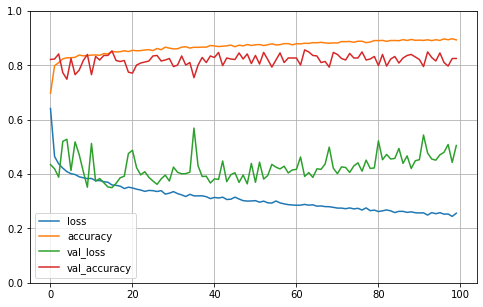

In [27]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

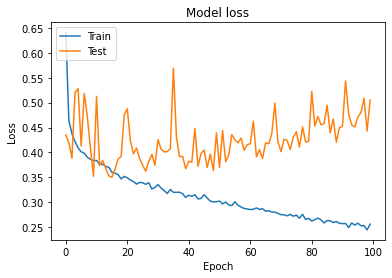

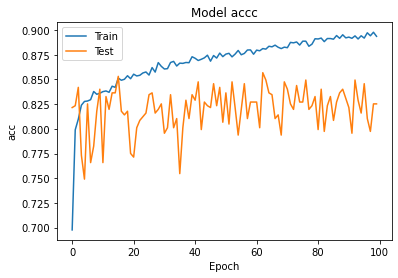

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accc')
plt.ylabel('acc')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

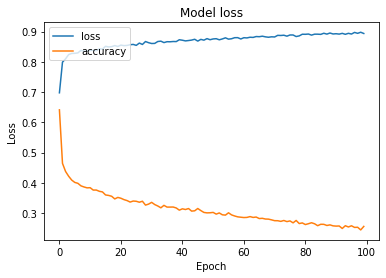

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['loss', 'accuracy'], loc='upper left')
plt.show()

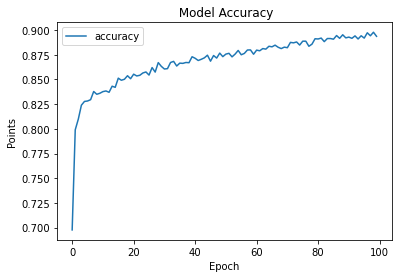

In [20]:
plt.plot(history.history['accuracy'])
plt.title(' Model Accuracy')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['accuracy'], loc='upper left')
plt.show()

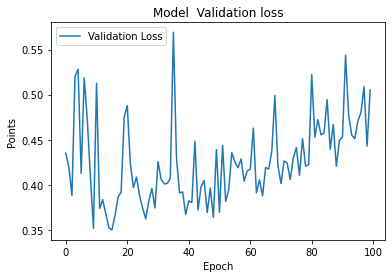

In [21]:
plt.plot(history.history['val_loss'])
plt.title('Model  Validation loss')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['Validation Loss'], loc='upper left')
plt.show()

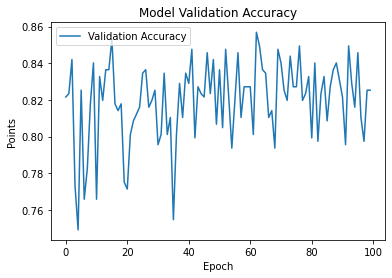

In [22]:
plt.plot(history.history['val_accuracy'])
plt.title('Model Validation Accuracy')
plt.ylabel('Points')
plt.xlabel('Epoch')
plt.legend(['Validation Accuracy'], loc='upper left')
plt.show()

In [23]:
model.evaluate(X_test, y_test)

17/17 [==============================] - 0s 1ms/step - loss: 0.5051 - accuracy: 0.8253


[0.5051482915878296, 0.8252788186073303]

In [24]:
#model.save('weights.h5')

In [25]:
1+1

2